### Aim

The aim of this lab is to learn the Watts-Strogatz model of a random network.

### Objectives

At the end of this lab, students should be able to:
1. Generate Watts-Strogatz graphs from an adjacency matrix and directly
2. Evaluate whether the Watts-Strogatz random network is a suitable model for a real network

In [11]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import random

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Watts-Strogatz model

The model has three parameters - $n$, the number of vertices; an even number $k$, the mean degree of a vertex, and $p$.

## Generation

To construct a Watts-Strogatz graph, we first make a *ring lattice* with $n$ vertices where each vertex is connected to $k$ nearest vertices on the right and on the left, i.e., $k$ must be an even number. And then we rewire each edge with probability $p$ by replacing $(u,v)$ with $(u,v')$, where $v'$ is chosen among all available vertices.

### Animation

First, let's generate a ring lattice.

In [12]:
n = 20
k = 6
p = 0.2

G = nx.empty_graph(n, nx.Graph())
for x, y in it.combinations(np.arange(n), 2):
    if (abs(x-y) % n <= k // 2) | (abs(x-y) % n >= n - k // 2):
        G.add_edge(x, y)

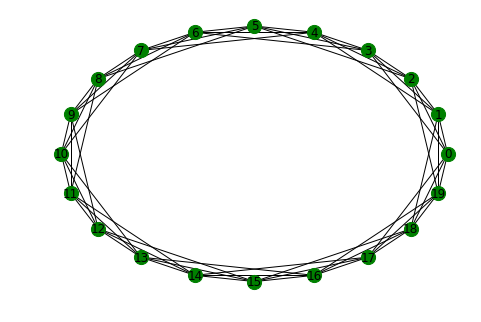

In [13]:
nx.draw_circular(G, 
                 node_size = 200,
                 node_color = 'green',
                 with_labels = True)
plt.show()

Now we will iterate through all edges, rewiring each with probability $p$.

In [14]:
list_of_graphs = [nx.Graph.copy(G)]

node_colors = ['red'] * n
node_color_list = [node_colors]

for x in np.arange(n):
    for y in (x + np.arange(1, k // 2 + 1)) % n:
        if np.random.rand(1) < p:
            possible_nodes_to_rewire = set(G.nodes()) - set(G.neighbors(x)) - {x}
            G.remove_edge(x, y)
            G.add_edge(x, random.sample(possible_nodes_to_rewire, 1)[0])
        list_of_graphs.append(nx.Graph.copy(G))
        new_colors = node_colors.copy()
        new_colors[x] = 'yellow'
        new_colors[y] = 'yellow'
        node_color_list.append(new_colors)

def plot_func(frame):
    nx.draw_circular(list_of_graphs[int(frame)], 
                     node_color = node_color_list[int(frame)],
                     with_labels = True)
    plt.show()

In [5]:
interact(plot_func, frame = widgets.Play(value=0,
                                         min=0,
                                         max=n * k // 2,
                                         step=1,
                                         description="Press play",
                                         disabled=False
))

interactive(children=(Play(value=0, description='Press play', max=60), Output()), _dom_classes=('widget-intera…

<function __main__.plot_func(frame)>

Here is the final result

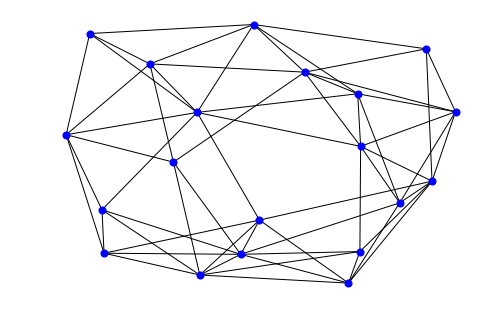

In [15]:
nx.draw(list_of_graphs[n * k  // 2], node_size = 50, node_color = 'blue')
plt.show()

### Networkx command

There is a ready function for generating a Watts-Strogatz graph in *networkx*

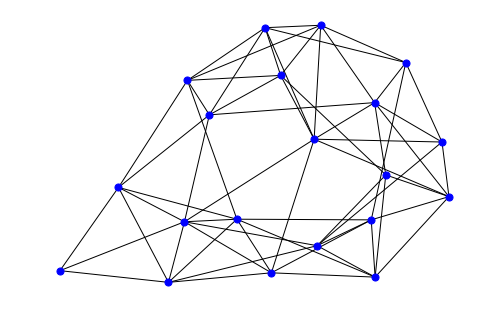

In [16]:
G = nx.watts_strogatz_graph(n, k, p)

nx.draw(G, node_size = 50, node_color = 'blue')
plt.show()

## Exercise 1

Generate directly, i.e., by a native *networkx* function, a Watts-Strogatz random graph with 500 vertices, 3000 edges, and $p=0.1$. Generate an Erdős–Rényi random graph with 500 vertices and approximately 3000 edges. Plot the two networks and compare their vertex degree histograms and average clustering coefficients.

## Solution

Type your solution here and your code below

## Exercise 2

Here, we explore the clustering coefficient of a Watts-Strogatz graph. 

### Part (a)

What is the clustering coefficient of the Watts-Strogatz graph for $p=0$ as a function of $n$ and $k$? Note that if $p=0$, then the Watts-Strogatz graph is just the ring lattice. Please provide some simple but rigirous explanation for your answer.

### Part (b)

Let's fix $n=500$ and $k=12$ and, for each $p=0, 0.01, 0.02,\cdots, 1$, generate a Watts-Strogatz graph and compute its clustering coefficient. Plot the graph of the clustering coefficient of a Watts-Strogatz graph vs $p$. You are not allowed to use explicit loops.

### Part (c)

What is the analytic expression for the clustering coefficient of a Watts-Strogatz graph? You can google the answer. Generate and plot a Watts-Strogatz graph with 500 vertices, 3000 edges, and expected clustering coefficient 0.6.

## Solution

### Part (a)

Type your solution here

## Part (b)

Type your code below

### Part (c)

Type your answer here and your code below

## Exercise 3

Load the adjacency matrix from the file "email_lab_6.txt" into Python and create a graph out of it. Like in Lab 5, this is the network of emails of some department - nodes represent employees and there is an edge whenever there was at least one email sent between the employees during the given time period. These data are collected from a different department than the data in Lab 5.

Plot the graph, find the number of vertices, the number of edges, and the clustering coefficient. Create a Watts-Strogatz network with (approximately) the same parameters. How well does the Watts-Strogatz model represent the real network?

## Solution

Type your solution here and your code below

## Exercise 4

In this and the next exercise, we will write a Python code to generate the adjacency matrix of a Watts-Strogatz network, i.e., we make our own version of the function `nx.watts_strogatz_graph`.

First, write a Python function that takes $n$ and $k$ as input and generates the adjacency matrix of the ring lattice. For instance, below is the matrix for $n=7$ and $k=4$:
$$
A(7,4)=
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 0 & 1 & 1 & 0
\end{bmatrix}
$$
Your function should not contain any loops or control statements.

This is a challenging exercise. Please feel free to ask a tutor's help and don't be discouraged if you can't do it.

## Solution

Type your solution here and your code below. Replace the body of the function with `create_circulant_matrix` with the code that returns the correct matrix.

In [17]:
def create_circulant_matrix(n, k):
    A = np.zeros((n, n))
    return A

print(create_circulant_matrix(7, 2))

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


## Exercise 5

Write a function that generates the adjacency matrix of a Watts-Strogatz network. It should start with creating the matrix of a ring lattice as in Exercise 4 and then do just one loop over all the vertices. In each loop iteration at vertex $i$, each edge from $i$ to vertices that are counter-clockwise on the circle is with probability $p$ replaced with an edge from $i$ to a random vertex chosen from all vertices that are not connected to $i$.

Note that we can't do this without an explicit loop because edge rewiring can't be applied to all vertices simultanaousely. However, one loop is enough and your function should only contain one `for` loop over all vertices and no other control statements. A template is provided below.

You will need the function `random.choice` from the library *numpy*.

## Solution

Type your solution here and your code in the template below. You should replace `None` with meaningful Python codes.

In [9]:
def generate_matrix_of_ws_network(n, k, p):
    A = create_circulant_matrix(n, k) # this is the function from Exercise 5
    for i in range(n):
        #### BEGIN OF YOUR INPUT ####
        # Below is the command that identifies all the vertices that are counter-clockwise from i
        v_maybe_rewired = None
        
        # Below is the command that identifies vertices v such that
        # the edge from i to v is actually rewired, 
        # this happens with probability p
        v_rewired = None
        
        # Below is the command that identifies all vertices v such that
        # there is no edge from v to i, i.e., if an edge is rewired, it may be rewire to v
        v_maybe_rewired_to = None
        
        # Below is the command that identifies all vertices that edges that are
        # actually rewired will be rewired to.
        # They should be just chosen randomly.
        v_rewired_to = None
        #### END OF YOUR INPUT ####
        
        # Below are the commands for rewiring - first, we remove edges that are rewired,
        # then we attach them to new vertices. These commands are fine, don't change them
        A[v_rewired, i] = 0 # note that we delete the old edge after we decide where it should be rewired
        A[i, v_rewired] = 0 # this may cause an erorr if 2k > n
        A[v_rewired_to, i] = 1 # if 2k > n, then deleting the old edge must be done before deciding where to rewire it
        A[i, v_rewired_to] = 1 # because then we would be able to rewire back to the same vertex
    
    return A

A = generate_matrix_of_ws_network(12, 6, 1)
print(A)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


Below we verify our algorithm

In [10]:
n, k, p = 500, 12, 0.1

A = generate_matrix_of_ws_network(500, 12, 0.1)
G = nx.Graph(A)
CC = nx.average_clustering(G)
n = nx.number_of_nodes(G)
print('|V| = ', n)
print('|E| = ', nx.number_of_edges(G))
print('Actual CC = ', CC)
print('Theoretical CC = ', 3 * (k - 2) / (4 * (k - 1)) * (1 - 0.1) ** 3)

|V| =  500
|E| =  125250
Actual CC =  1.0
Theoretical CC =  0.49704545454545457


# Conclusion

In today's lab, we covered new material on Watts-Strogatz networks. We have learned how to create Watts-Strogatz networks and what their properties are. In order to implement our own version of the algorithm generating a Watts-Strogatz network, we needed to review some material from the first weeks, such as indexing a matrix.

The main takeaway is that although the Watts-Strogatz model replicates high clustering of real social networks, it does not capture vertex degree distribution of real networks.

Now please fill the following survey form to provide your feedback on the course:

https://tinyurl.com/mh2401-week6-feedback

For instance, the course instructors need to know if this handout is sufficient to understand the material and if lab assistants are helpful and their explanations are clear.